#Problem Statement

The problem is to predict the bonus for agents in a leading life insurance company based on their performance metrics and other relevant factors. The company aims to design appropriate engagement activities for high-performing agents and develop upskill programs for low-performing agents. By accurately predicting the bonus amounts, the company can effectively allocate resources and implement targeted strategies to incentivize and improve agent performance.

The objective is to develop a machine learning model that takes into account historical agent performance data, customer satisfaction ratings, sales targets, training hours completed, and other relevant features to predict the bonus amount for each agent. The model should be able to generalize well to new data and provide reliable predictions. The predicted bonus amounts will be used to identify high-performing agents who deserve recognition and rewards, as well as low-performing agents who require additional training and support.

By addressing this problem, the life insurance company can enhance agent motivation, engagement, and productivity. This, in turn, can lead to improved customer service, increased sales, and overall business growth.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

In [2]:
df = pd.read_excel('/content/drive/MyDrive/great learning/Sales.xlsx')

In [3]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [4]:
df.shape

(4520, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,4520.0,7.002260e+06,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,4.077838e+03,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,1.449471e+01,9.037629,2.0,7.00,13.0,20.00,58.0
CustTenure,4294.0,1.446903e+01,8.963671,2.0,7.00,13.0,20.00,57.0
ExistingProdType,4520.0,3.688938e+00,1.015769,1.0,3.00,4.0,4.00,6.0
NumberOfPolicy,4475.0,3.565363e+00,1.455926,1.0,2.00,4.0,5.00,6.0
MonthlyIncome,4284.0,2.289031e+04,4885.600757,16009.0,19683.50,21606.0,24725.00,38456.0
Complaint,4520.0,2.871681e-01,0.452491,0.0,0.00,0.0,1.00,1.0
ExistingPolicyTenure,4336.0,4.130074e+00,3.346386,1.0,2.00,3.0,6.00,25.0
SumAssured,4366.0,6.199997e+05,246234.822140,168536.0,439443.25,578976.5,758236.00,1838496.0


# Null Values Treatment

In [7]:
df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [8]:
null_percentages = (df.isnull().sum() / len(df)) * 100

null_percentages.sort_values(ascending=False)

Age                     5.951327
MonthlyIncome           5.221239
CustTenure              5.000000
ExistingPolicyTenure    4.070796
SumAssured              3.407080
CustCareScore           1.150442
NumberOfPolicy          0.995575
Gender                  0.000000
ExistingProdType        0.000000
Designation             0.000000
AgentBonus              0.000000
MaritalStatus           0.000000
EducationField          0.000000
Complaint               0.000000
Occupation              0.000000
Channel                 0.000000
Zone                    0.000000
PaymentMethod           0.000000
LastMonthCalls          0.000000
CustID                  0.000000
dtype: float64

In [9]:
df = df.fillna(method = 'pad')

In [10]:
df.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [11]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,294502.0,North,Yearly,0,3.0
3,7000003,1791,11.0,4.0,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,4.0,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


# Outliers Detection

In [12]:
numeric_data = df.select_dtypes(include=['float64','int64']).columns
print(numeric_data)

cat_data = df.select_dtypes(include=['object']).columns
print(cat_data)

Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'ExistingProdType',
       'NumberOfPolicy', 'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure',
       'SumAssured', 'LastMonthCalls', 'CustCareScore'],
      dtype='object')
Index(['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation',
       'MaritalStatus', 'Zone', 'PaymentMethod'],
      dtype='object')


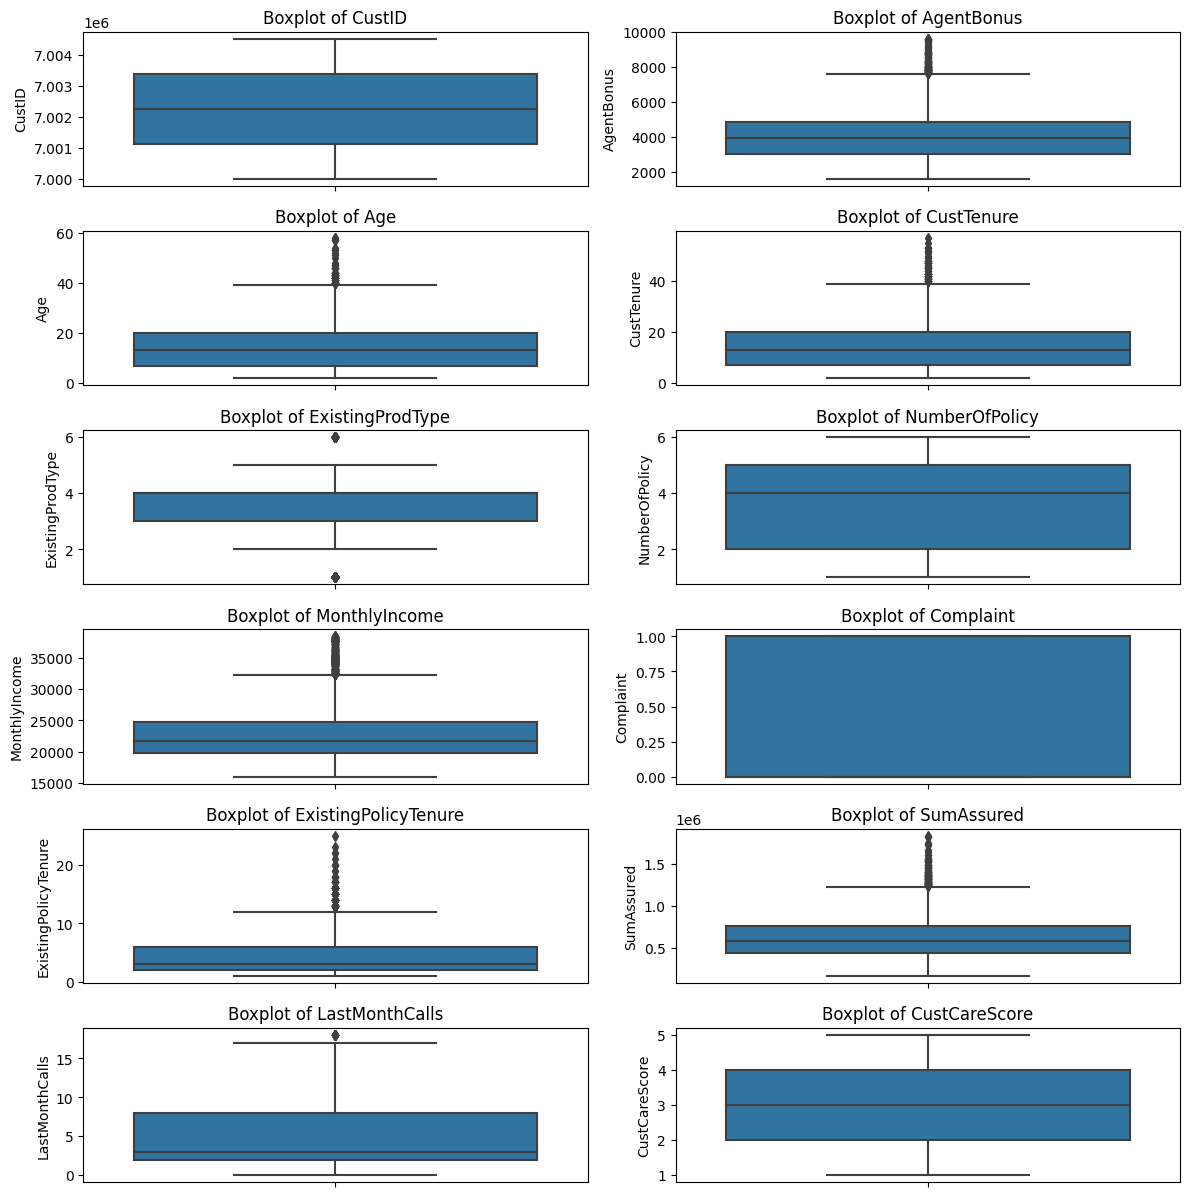

In [13]:
plt.figure(figsize=(12,20))
for i in range(len(numeric_data)):
    plt.subplot(10,2,i+1)
    sns.boxplot(y=df[numeric_data[i]]);
    plt.title('Boxplot of {}'.format(numeric_data[i]))
    plt.tight_layout();

In [14]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [15]:
for column in numeric_data:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])
print(lr)


-1.0


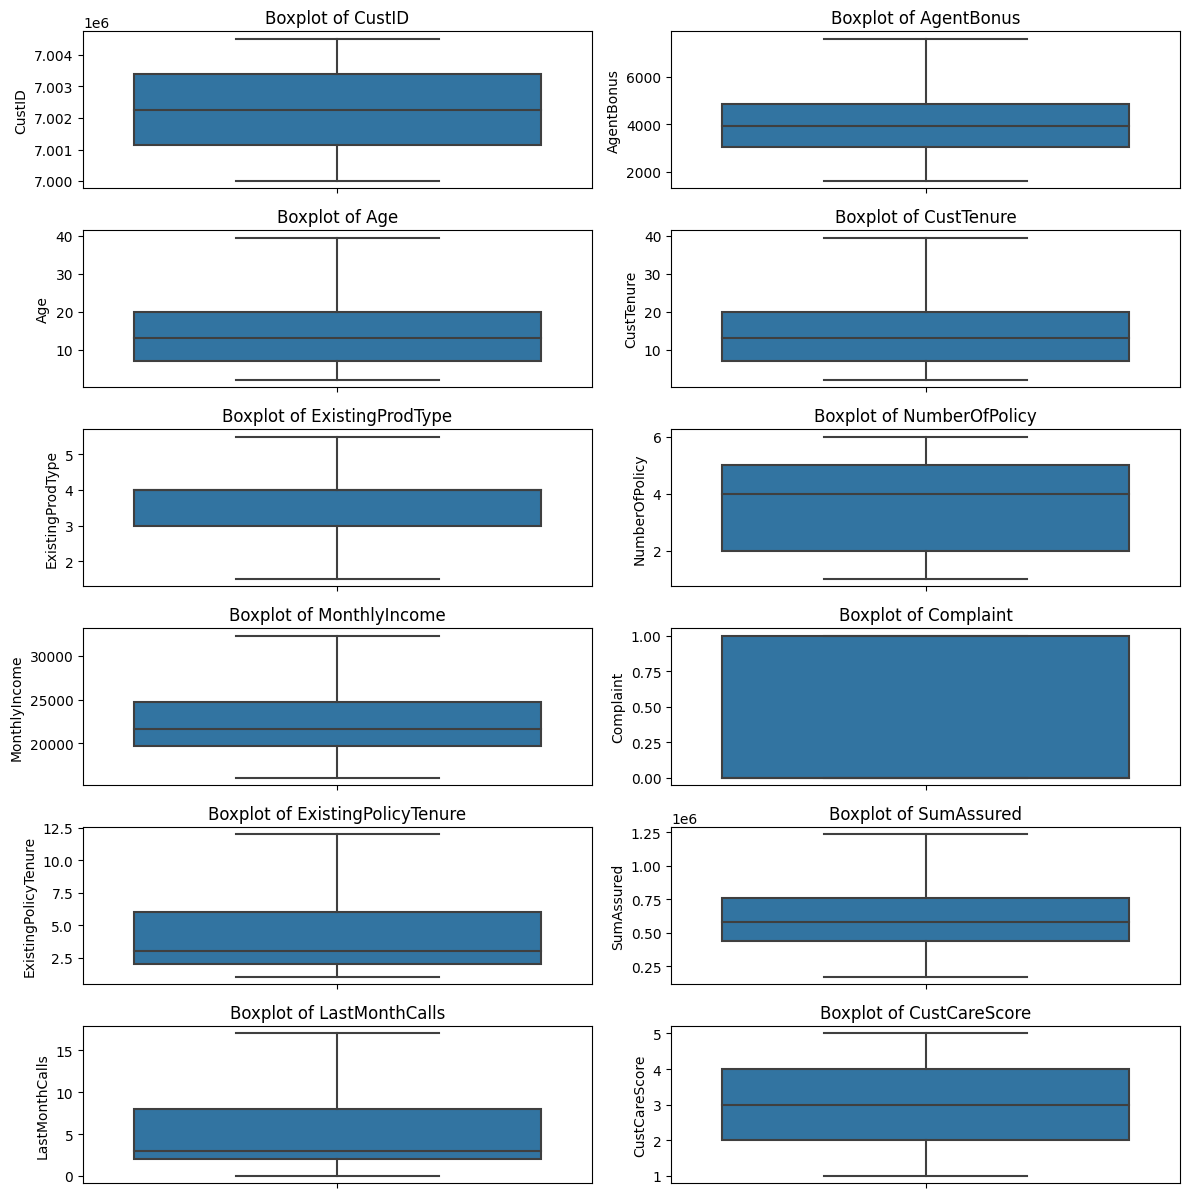

In [16]:
plt.figure(figsize=(12,20))
for i in range(len(numeric_data)):
    plt.subplot(10,2,i+1)
    sns.boxplot(y=df[numeric_data[i]]);
    plt.title('Boxplot of {}'.format(numeric_data[i]))
    plt.tight_layout();

In [17]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000.0,4409.0,22.0,4.0,Agent,Salaried,Graduate,Female,3.0,Manager,2.0,Single,20993.0,1.0,2.0,806761.0,North,Half Yearly,5.0,2.0
1,7000001.0,2214.0,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4.0,Manager,4.0,Divorced,20130.0,0.0,3.0,294502.0,North,Yearly,7.0,3.0
2,7000002.0,4273.0,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4.0,Exe,3.0,Unmarried,17090.0,1.0,2.0,294502.0,North,Yearly,0.0,3.0
3,7000003.0,1791.0,11.0,4.0,Third Party Partner,Salaried,Graduate,Fe male,3.0,Executive,3.0,Divorced,17909.0,1.0,2.0,268635.0,West,Half Yearly,0.0,5.0
4,7000004.0,2955.0,6.0,4.0,Agent,Small Business,UG,Male,3.0,Executive,4.0,Divorced,18468.0,0.0,4.0,366405.0,West,Half Yearly,2.0,5.0


In [18]:
 df.duplicated().sum()

0

In [19]:
df = df.drop_duplicates()


In [20]:
for i in df.columns:
  print(i,'Unique values are :\n')
  print(df[i].unique(),'\n')

CustID Unique values are :

[7000000. 7000001. 7000002. ... 7004517. 7004518. 7004519.] 

AgentBonus Unique values are :

[4409. 2214. 4273. ... 4377. 2541. 3953.] 

Age Unique values are :

[22.  11.  26.   6.   7.  12.   8.  20.  18.  10.   9.   5.  30.  14.
 16.  13.   2.   4.  15.  27.  23.  37.  33.  19.  17.  25.  21.  24.
 29.  39.5 31.  28.   3.  35.  32.  34.  39.  38.  36. ] 

CustTenure Unique values are :

[ 4.   2.  23.  11.   3.   7.  27.  22.  17.   5.  21.  18.  25.  14.
  8.  15.  31.   9.  26.  16.  10.   6.  20.  24.  30.  12.  38.  29.
 39.  28.  19.  13.  39.5 36.  32.  34.  35.  33.  37. ] 

Channel Unique values are :

['Agent' 'Third Party Partner' 'Online'] 

Occupation Unique values are :

['Salaried' 'Free Lancer' 'Small Business' 'Laarge Business'
 'Large Business'] 

EducationField Unique values are :

['Graduate' 'Post Graduate' 'UG' 'Under Graduate' 'Engineer' 'Diploma'
 'MBA'] 

Gender Unique values are :

['Female' 'Male' 'Fe male'] 

ExistingProdType U

In [21]:
df['Occupation'] = df['Occupation'].replace('Laarge Business','Large Business')

In [22]:
df['Occupation'].unique()

array(['Salaried', 'Free Lancer', 'Small Business', 'Large Business'],
      dtype=object)

In [23]:
df['EducationField'] = df['EducationField'].replace(['UG'],['Under Graduate'])

In [24]:
df['EducationField'].unique()

array(['Graduate', 'Post Graduate', 'Under Graduate', 'Engineer',
       'Diploma', 'MBA'], dtype=object)

In [25]:
df['Designation'] = df['Designation'].replace('Exe','Executive')

In [26]:
df['Designation'].unique()

array(['Manager', 'Executive', 'VP', 'AVP', 'Senior Manager'],
      dtype=object)

In [27]:
df['Gender'] = df['Gender'].replace('Fe male','Female')
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [28]:
cleaned_data = df.copy()

In [29]:

# df.to_excel('/content/cleaned_data.xlsx', index=False)

# from google.colab import files
# files.download('/content/cleaned_data.xlsx')



In [30]:
df.drop('CustID',axis=1,inplace=True)

# Univariant Analysis


In [31]:
df.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409.0,22.0,4.0,Agent,Salaried,Graduate,Female,3.0,Manager,2.0,Single,20993.0,1.0,2.0,806761.0,North,Half Yearly,5.0,2.0
1,2214.0,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4.0,Manager,4.0,Divorced,20130.0,0.0,3.0,294502.0,North,Yearly,7.0,3.0
2,4273.0,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4.0,Executive,3.0,Unmarried,17090.0,1.0,2.0,294502.0,North,Yearly,0.0,3.0
3,1791.0,11.0,4.0,Third Party Partner,Salaried,Graduate,Female,3.0,Executive,3.0,Divorced,17909.0,1.0,2.0,268635.0,West,Half Yearly,0.0,5.0
4,2955.0,6.0,4.0,Agent,Small Business,Under Graduate,Male,3.0,Executive,4.0,Divorced,18468.0,0.0,4.0,366405.0,West,Half Yearly,2.0,5.0


In [32]:
for i in cat_data:
  df[i] =df[i].astype('category')


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   AgentBonus            4520 non-null   float64 
 1   Age                   4520 non-null   float64 
 2   CustTenure            4520 non-null   float64 
 3   Channel               4520 non-null   category
 4   Occupation            4520 non-null   category
 5   EducationField        4520 non-null   category
 6   Gender                4520 non-null   category
 7   ExistingProdType      4520 non-null   float64 
 8   Designation           4520 non-null   category
 9   NumberOfPolicy        4520 non-null   float64 
 10  MaritalStatus         4520 non-null   category
 11  MonthlyIncome         4520 non-null   float64 
 12  Complaint             4520 non-null   float64 
 13  ExistingPolicyTenure  4520 non-null   float64 
 14  SumAssured            4520 non-null   float64 
 15  Zone

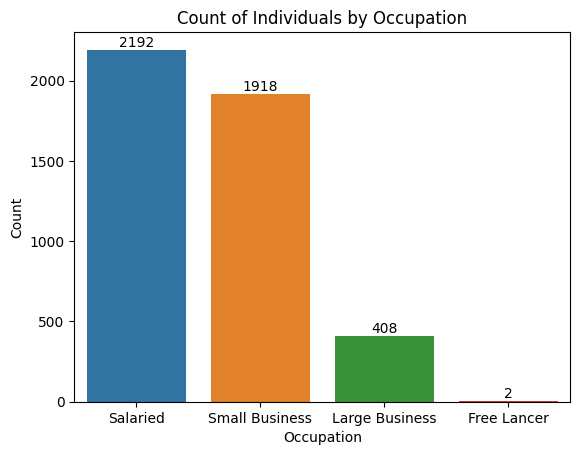

In [34]:
counts = df['Occupation'].value_counts()
categories = counts.index

sns.countplot(data=df, x='Occupation',order=categories)

plt.title('Count of Individuals by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')

for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

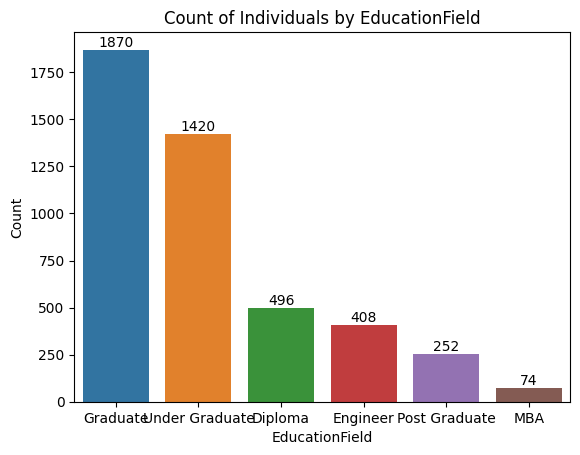

In [35]:
counts = df['EducationField'].value_counts()
categories = counts.index

sns.countplot(data=df, x='EducationField',order=categories)

plt.title('Count of Individuals by EducationField')
plt.xlabel('EducationField')
plt.ylabel('Count')
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

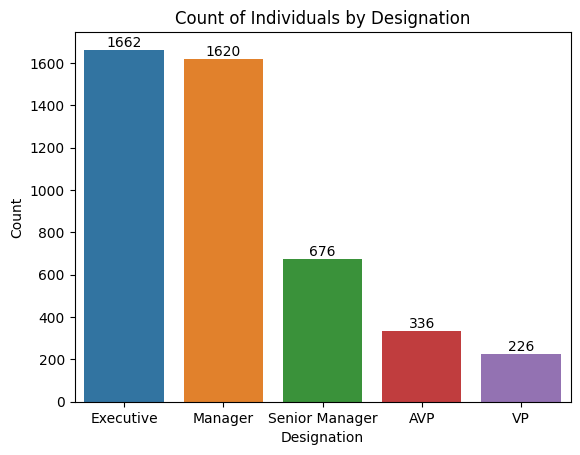

In [36]:
counts = df['Designation'].value_counts()
categories = counts.index

sns.countplot(data=df, x='Designation',order=categories)

plt.title('Count of Individuals by Designation')
plt.xlabel('Designation')
plt.ylabel('Count')


for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

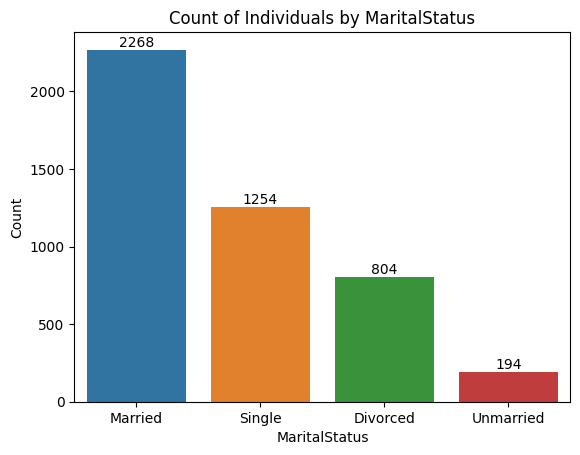

In [37]:
counts = df['MaritalStatus'].value_counts()
categories = counts.index

sns.countplot(data=df, x='MaritalStatus',order=categories)

plt.title('Count of Individuals by MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')

for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

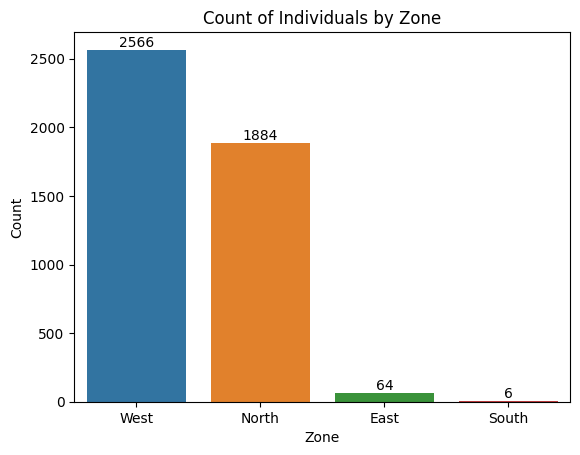

In [38]:
counts = df['Zone'].value_counts()
categories = counts.index

sns.countplot(data=df, x='Zone',order=categories)

plt.title('Count of Individuals by Zone')
plt.xlabel('Zone')
plt.ylabel('Count')

for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

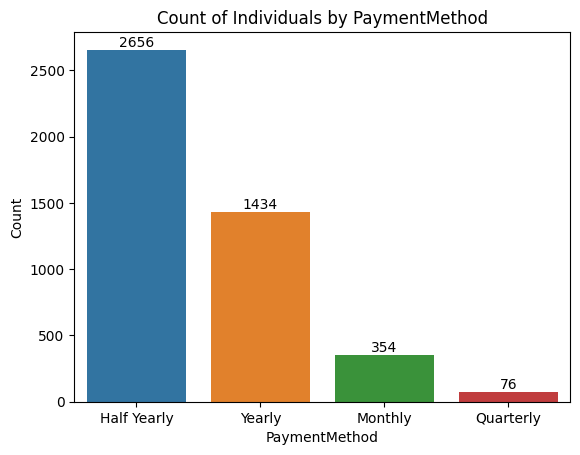

In [39]:
counts = df['PaymentMethod'].value_counts()
categories = counts.index

sns.countplot(data=df, x='PaymentMethod',order=categories)

plt.title('Count of Individuals by PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')

for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

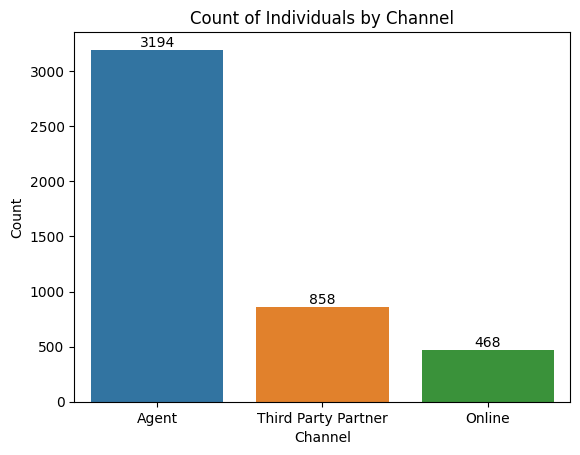

In [40]:
counts = df['Channel'].value_counts()
categories = counts.index

sns.countplot(data=df, x='Channel',order=categories)

plt.title('Count of Individuals by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')

for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

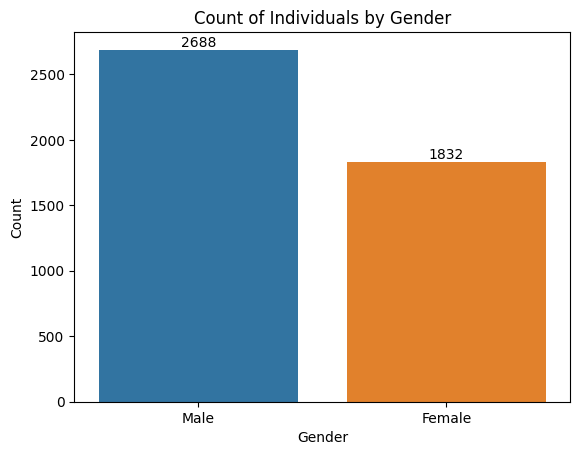

In [41]:
counts = df['Gender'].value_counts()
categories = counts.index

sns.countplot(data=df, x='Gender',order=categories)

plt.title('Count of Individuals by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')


for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

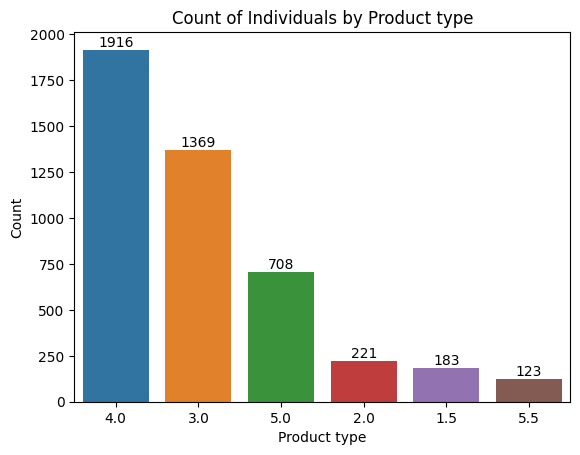

In [42]:
counts = df['ExistingProdType'].value_counts()
categories = counts.index

sns.countplot(data=df, x='ExistingProdType',order=categories)

plt.title('Count of Individuals by Product type')
plt.xlabel('Product type')
plt.ylabel('Count')

for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

In [43]:
df.columns

Index(['AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

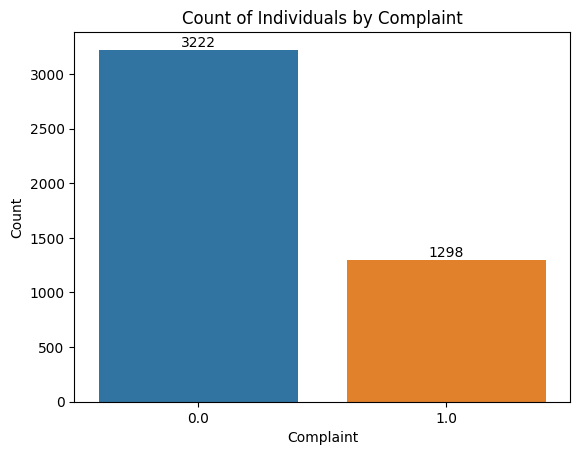

In [44]:
counts = df['Complaint'].value_counts()
categories = counts.index

sns.countplot(data=df, x='Complaint',order=categories)

plt.title('Count of Individuals by Complaint')
plt.xlabel('Complaint')
plt.ylabel('Count')

for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

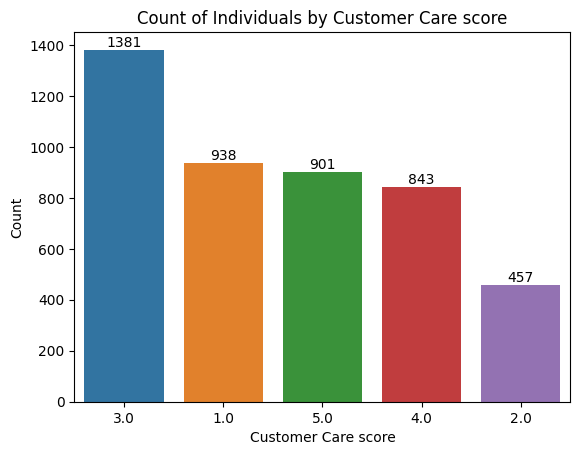

In [45]:
counts = df['CustCareScore'].value_counts()
categories = counts.index

sns.countplot(data=df, x='CustCareScore',order=categories)

plt.title('Count of Individuals by Customer Care score')
plt.xlabel('Customer Care score')
plt.ylabel('Count')

for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

Text(0, 0.5, 'Count')

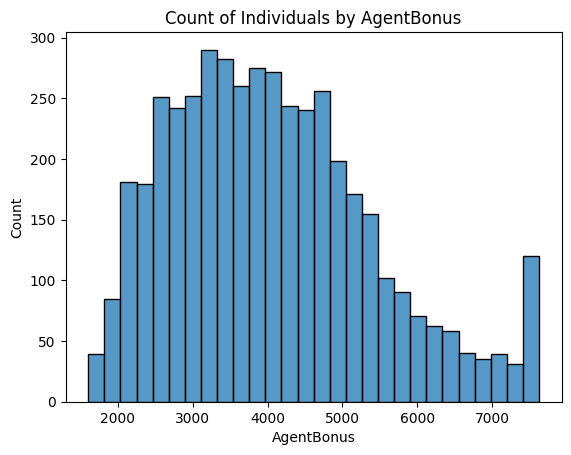

In [46]:
sns.histplot(df['AgentBonus'])
plt.title('Count of Individuals by AgentBonus')
plt.xlabel('AgentBonus')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

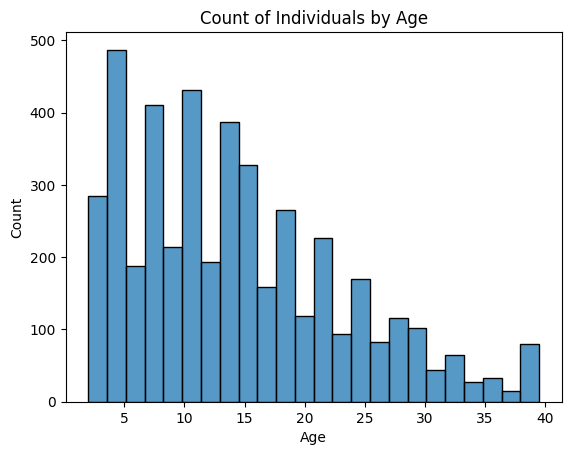

In [47]:
sns.histplot(df['Age'])
plt.title('Count of Individuals by Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

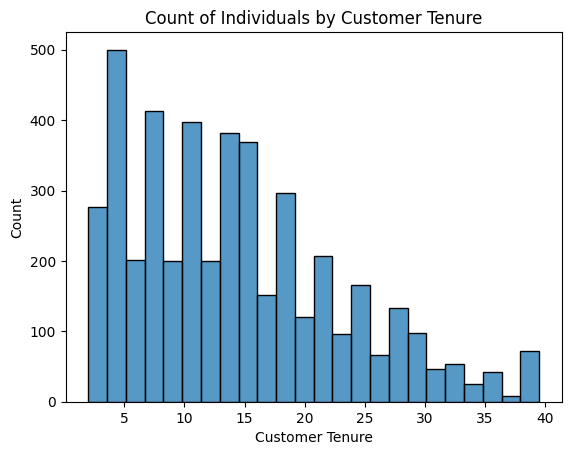

In [48]:
sns.histplot(df['CustTenure'])
plt.title('Count of Individuals by Customer Tenure')
plt.xlabel('Customer Tenure')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

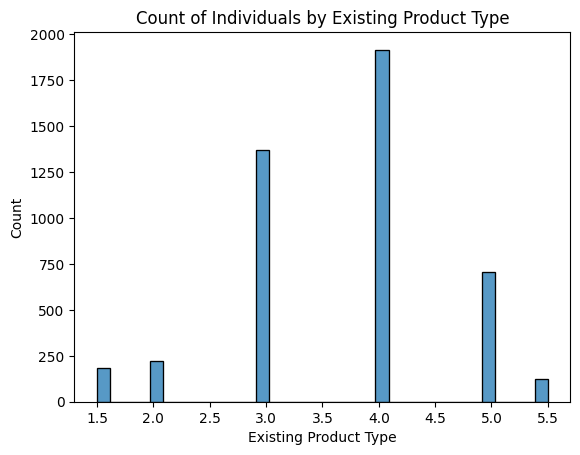

In [49]:
sns.histplot(df['ExistingProdType'])
plt.title('Count of Individuals by Existing Product Type')
plt.xlabel('Existing Product Type')
plt.ylabel('Count')

In [50]:
age_counts = df['ExistingProdType'].value_counts()
print(age_counts)


4.0    1916
3.0    1369
5.0     708
2.0     221
1.5     183
5.5     123
Name: ExistingProdType, dtype: int64


Text(0, 0.5, 'Count')

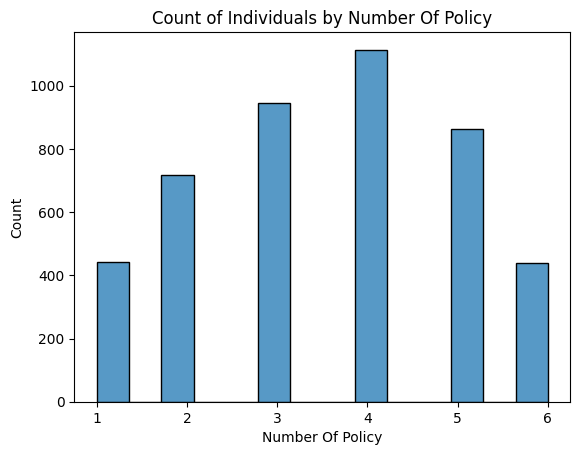

In [51]:
sns.histplot(df['NumberOfPolicy'])
plt.title('Count of Individuals by Number Of Policy')
plt.xlabel('Number Of Policy')
plt.ylabel('Count')

In [52]:
age_counts = df['NumberOfPolicy'].value_counts()
print(age_counts)


4.0    1114
3.0     944
5.0     863
2.0     718
1.0     442
6.0     439
Name: NumberOfPolicy, dtype: int64


Text(0, 0.5, 'Count')

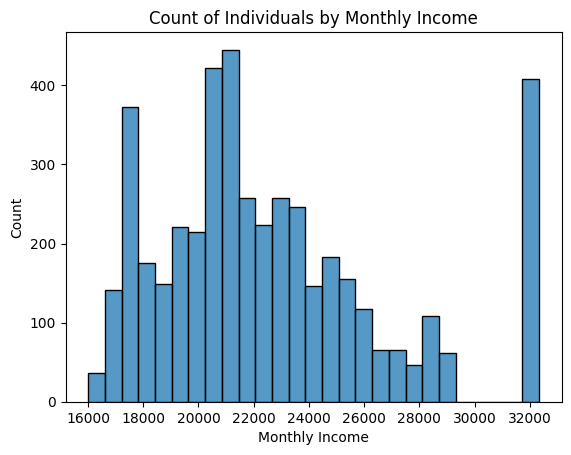

In [53]:
sns.histplot(df['MonthlyIncome'])
plt.title('Count of Individuals by Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

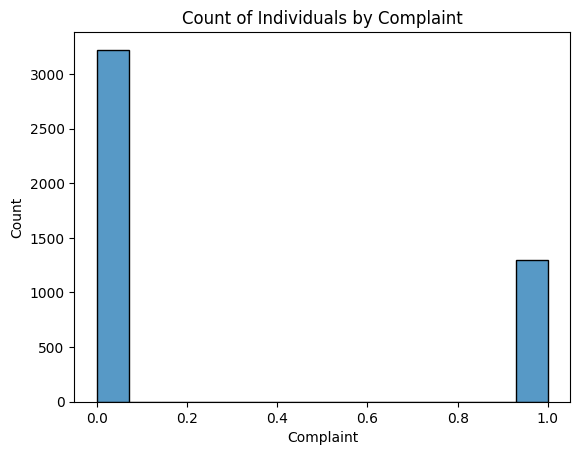

In [54]:
sns.histplot(df['Complaint'])
plt.title('Count of Individuals by Complaint')
plt.xlabel('Complaint')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

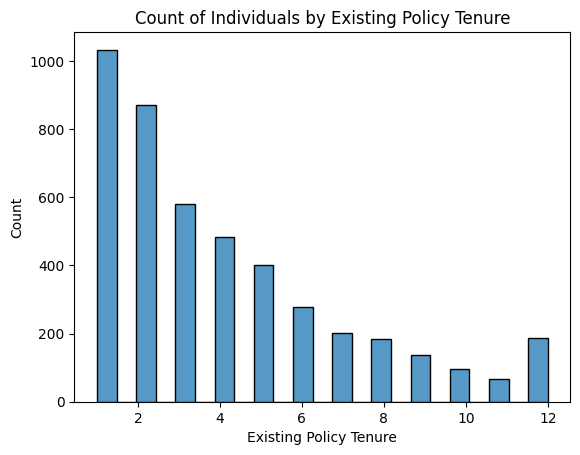

In [55]:
sns.histplot(df['ExistingPolicyTenure'])
plt.title('Count of Individuals by Existing Policy Tenure')
plt.xlabel('Existing Policy Tenure')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

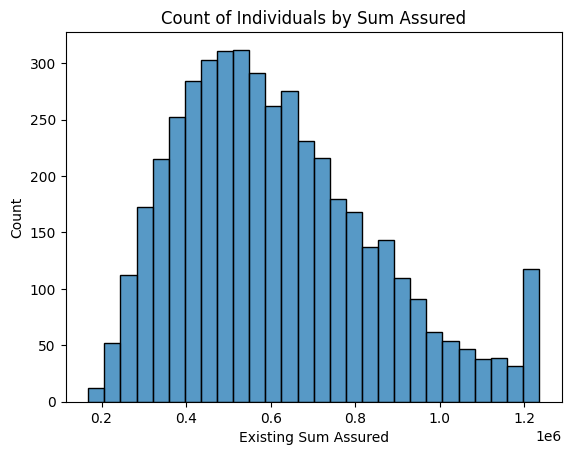

In [56]:
sns.histplot(df['SumAssured'])
plt.title('Count of Individuals by Sum Assured')
plt.xlabel('Existing Sum Assured')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

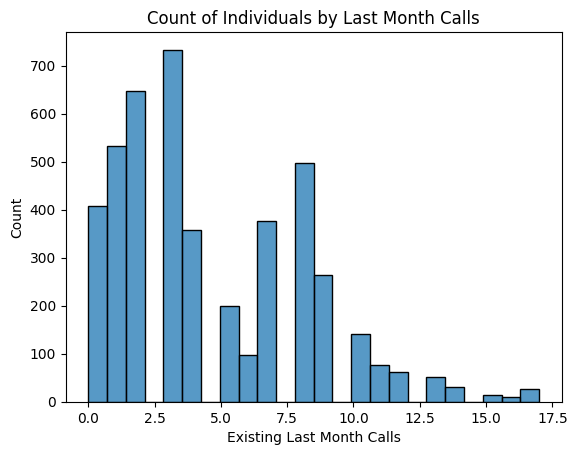

In [57]:
sns.histplot(df['LastMonthCalls'])
plt.title('Count of Individuals by Last Month Calls')
plt.xlabel('Existing Last Month Calls')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

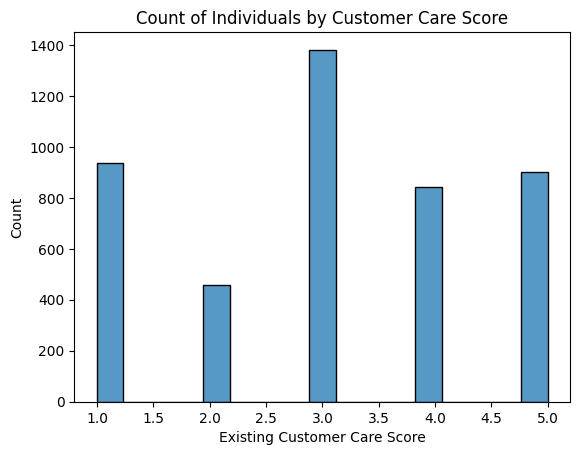

In [58]:
sns.histplot(df['CustCareScore'])
plt.title('Count of Individuals by Customer Care Score')
plt.xlabel('Existing Customer Care Score')
plt.ylabel('Count')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   AgentBonus            4520 non-null   float64 
 1   Age                   4520 non-null   float64 
 2   CustTenure            4520 non-null   float64 
 3   Channel               4520 non-null   category
 4   Occupation            4520 non-null   category
 5   EducationField        4520 non-null   category
 6   Gender                4520 non-null   category
 7   ExistingProdType      4520 non-null   float64 
 8   Designation           4520 non-null   category
 9   NumberOfPolicy        4520 non-null   float64 
 10  MaritalStatus         4520 non-null   category
 11  MonthlyIncome         4520 non-null   float64 
 12  Complaint             4520 non-null   float64 
 13  ExistingPolicyTenure  4520 non-null   float64 
 14  SumAssured            4520 non-null   float64 
 15  Zone

In [60]:
8

8

# Bivariant Analysis

Text(0.5, 1.0, 'Scatter Plot of Age vs Agent Bonus')

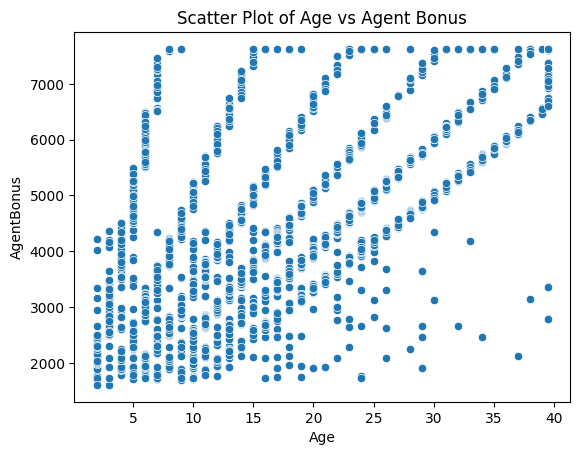

In [61]:
sns.scatterplot(x=df['Age'],y=df['AgentBonus'])
plt.title('Scatter Plot of Age vs Agent Bonus')

In [62]:
df.groupby(by=df['Age'])['AgentBonus'].mean()

Age
2.0     2269.566265
3.0     3014.094527
4.0     3691.051064
5.0     3928.011905
6.0     3796.888298
7.0     3530.357143
8.0     3648.021834
9.0     3615.098131
10.0    3530.269058
11.0    3710.158654
12.0    3651.067358
13.0    3690.617801
14.0    3939.076531
15.0    3974.739521
16.0    3847.415625
17.0    3874.091195
18.0    4254.274074
19.0    4263.603846
20.0    4555.655462
21.0    4297.646552
22.0    4484.327273
23.0    4603.462766
24.0    4768.247706
25.0    4707.000000
26.0    4923.644578
27.0    4909.435484
28.0    5301.361111
29.0    5192.409836
30.0    5367.634146
31.0    5791.375000
32.0    5840.762500
33.0    6094.620000
34.0    5982.259259
35.0    6443.105263
36.0    6326.857143
37.0    6492.433333
38.0    6784.157895
39.0    6627.500000
39.5    7181.980769
Name: AgentBonus, dtype: float64

Text(0.5, 1.0, 'Scatter Plot of Sum Assured vs Agent Bonus')

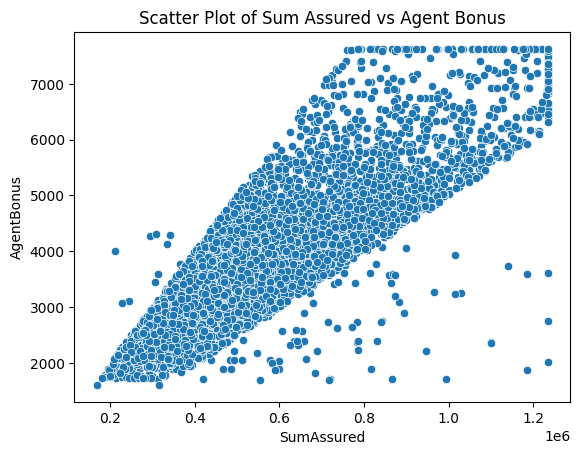

In [63]:
sns.scatterplot(x=df['SumAssured'],y=df['AgentBonus'])
plt.title('Scatter Plot of Sum Assured vs Agent Bonus')


In [64]:
df.groupby(by=df['SumAssured'])['AgentBonus'].mean()

SumAssured
168536.000     1605.00
180222.000     1733.00
187855.000     1739.00
188394.000     1777.00
195533.000     1898.00
                ...   
1220989.000    6672.00
1224720.000    6480.00
1231133.000    6802.00
1232163.000    6884.00
1234574.875    7218.39
Name: AgentBonus, Length: 4260, dtype: float64

Text(0.5, 1.0, 'Scatter Plot of Sum Assured vs Age')

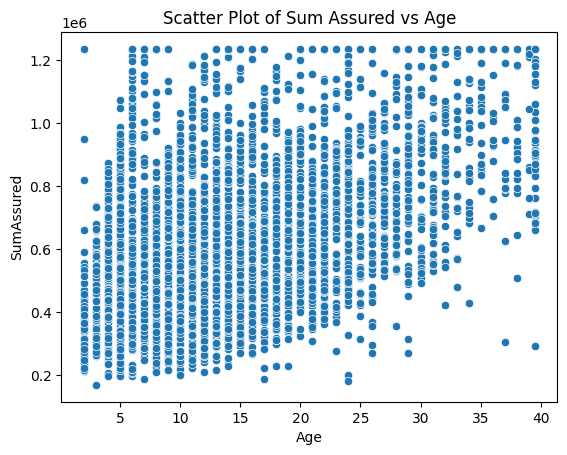

In [65]:
sns.scatterplot(y=df['SumAssured'],x=df['Age'])
plt.title('Scatter Plot of Sum Assured vs Age')

In [66]:
df.groupby(by=df['Age'])['SumAssured'].mean()

Age
2.0     3.854536e+05
3.0     4.506484e+05
4.0     5.541479e+05
5.0     5.766009e+05
6.0     5.729384e+05
7.0     5.539929e+05
8.0     5.540312e+05
9.0     5.611837e+05
10.0    5.441792e+05
11.0    5.761652e+05
12.0    5.603491e+05
13.0    5.678078e+05
14.0    5.999179e+05
15.0    6.023533e+05
16.0    6.029933e+05
17.0    5.829526e+05
18.0    6.432403e+05
19.0    6.314055e+05
20.0    6.757837e+05
21.0    6.330123e+05
22.0    6.908425e+05
23.0    7.120385e+05
24.0    7.315069e+05
25.0    6.810222e+05
26.0    7.350893e+05
27.0    7.655449e+05
28.0    7.941095e+05
29.0    7.964808e+05
30.0    8.158958e+05
31.0    8.300422e+05
32.0    8.538226e+05
33.0    8.999832e+05
34.0    9.316267e+05
35.0    1.003439e+06
36.0    1.000154e+06
37.0    9.339087e+05
38.0    9.778960e+05
39.0    1.013643e+06
39.5    1.013542e+06
Name: SumAssured, dtype: float64

Text(0.5, 1.0, 'Scatter Plot of Channel vs Agent Bonus')

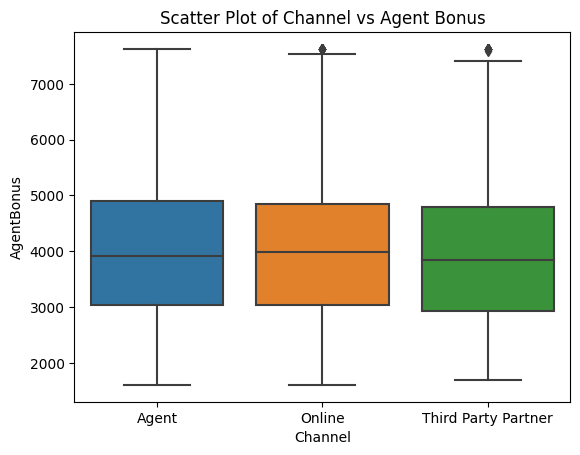

In [67]:
sns.boxplot(x=df['Channel'],y=df['AgentBonus'])
plt.title('Scatter Plot of Channel vs Agent Bonus')

In [68]:
df.groupby(by=df['Channel'])['AgentBonus'].mean()

Channel
Agent                  4088.289919
Online                 4085.305556
Third Party Partner    3955.497669
Name: AgentBonus, dtype: float64

Text(0.5, 1.0, 'Scatter Plot of Occupation vs Sum Assured')

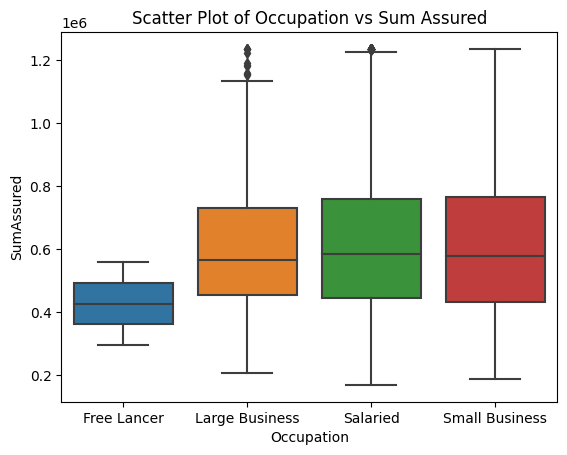

In [69]:
sns.boxplot(x=df['Occupation'],y=df['SumAssured'])
plt.title('Scatter Plot of Occupation vs Sum Assured')

In [70]:
df.groupby(by=df['Occupation'])['SumAssured'].mean()

Occupation
Free Lancer       426484.500000
Large Business    599346.535846
Salaried          618792.270928
Small Business    616861.984359
Name: SumAssured, dtype: float64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   AgentBonus            4520 non-null   float64 
 1   Age                   4520 non-null   float64 
 2   CustTenure            4520 non-null   float64 
 3   Channel               4520 non-null   category
 4   Occupation            4520 non-null   category
 5   EducationField        4520 non-null   category
 6   Gender                4520 non-null   category
 7   ExistingProdType      4520 non-null   float64 
 8   Designation           4520 non-null   category
 9   NumberOfPolicy        4520 non-null   float64 
 10  MaritalStatus         4520 non-null   category
 11  MonthlyIncome         4520 non-null   float64 
 12  Complaint             4520 non-null   float64 
 13  ExistingPolicyTenure  4520 non-null   float64 
 14  SumAssured            4520 non-null   float64 
 15  Zone

Text(0.5, 1.0, 'Scatter Plot of Monthly Income vs Sum Assured')

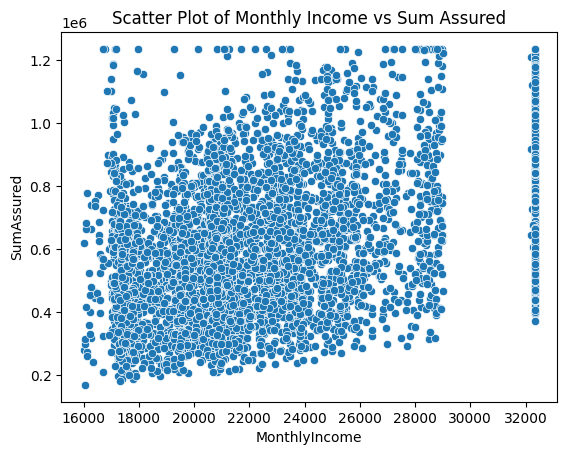

In [72]:
sns.scatterplot(y=df['SumAssured'],x=df['MonthlyIncome'])
plt.title('Scatter Plot of Monthly Income vs Sum Assured')

Text(0.5, 1.0, 'Scatter Plot of Customer Tenure vs Agent Bonus')

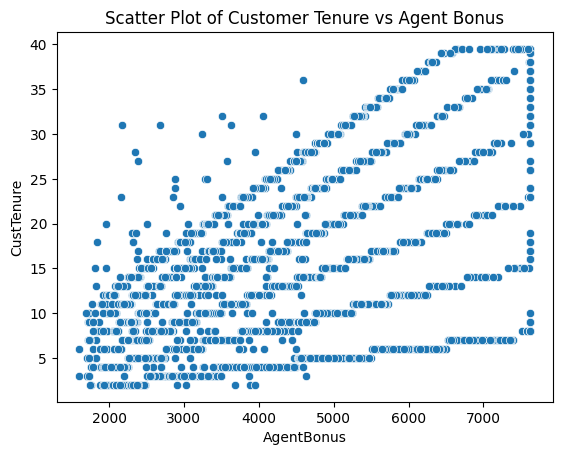

In [73]:
sns.scatterplot(y=df['CustTenure'],x=df['AgentBonus'])
plt.title('Scatter Plot of Customer Tenure vs Agent Bonus')

In [74]:
df.groupby(by=df['CustTenure'])['AgentBonus'].mean()

CustTenure
2.0     2317.467742
3.0     2983.716279
4.0     3434.885185
5.0     4042.673913
6.0     3791.731343
7.0     3818.904762
8.0     3481.066502
9.0     3520.750000
10.0    3608.522026
11.0    3563.823529
12.0    3732.395000
13.0    3647.301980
14.0    3861.698324
15.0    3852.650273
16.0    3972.698925
17.0    4056.493421
18.0    4075.619718
19.0    4297.561688
20.0    4338.355372
21.0    4444.400000
22.0    4581.103093
23.0    4683.869792
24.0    4750.650538
25.0    4836.931507
26.0    5144.750000
27.0    5092.198529
28.0    5309.692308
29.0    5516.081967
30.0    5290.864865
31.0    5715.861702
32.0    5749.471429
33.0    6041.000000
34.0    5920.780000
35.0    6492.062500
36.0    6636.500000
37.0    6697.750000
38.0    6800.875000
39.0    6968.791667
39.5    7430.326923
Name: AgentBonus, dtype: float64

Text(0.5, 1.0, 'Scatter Plot of Customer Tenure vs Sum Assured')

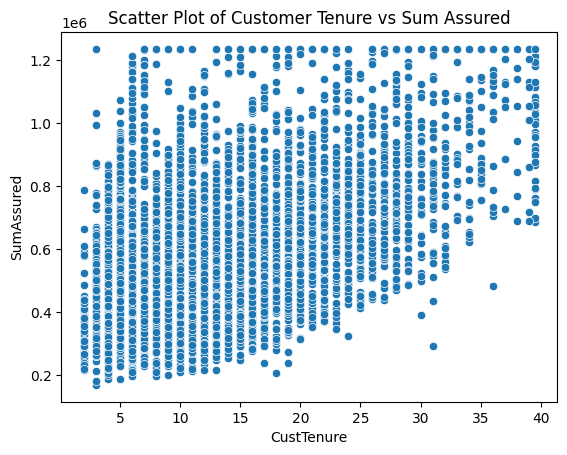

In [75]:
sns.scatterplot(y=df['SumAssured'],x=df['CustTenure'])
plt.title('Scatter Plot of Customer Tenure vs Sum Assured')

Text(0.5, 1.0, 'Scatter Plot of Zone vs Agent Bonus')

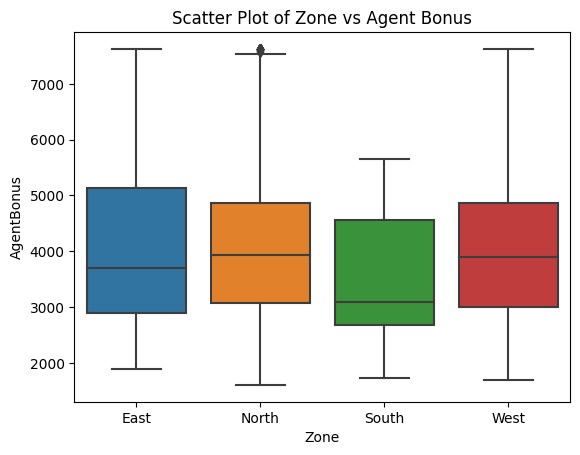

In [76]:
sns.boxplot(x=df['Zone'],y=df['AgentBonus'])
plt.title('Scatter Plot of Zone vs Agent Bonus')

Text(0.5, 1.0, 'Scatter Plot of Marital Status vs Agent Bonus')

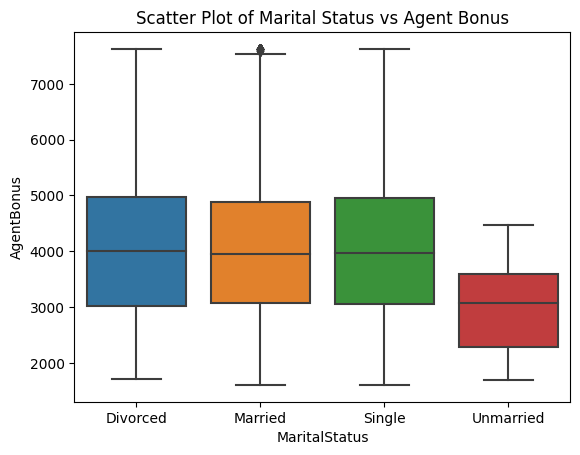

In [77]:
sns.boxplot(x=df['MaritalStatus'],y=df['AgentBonus'])
plt.title('Scatter Plot of Marital Status vs Agent Bonus')

Text(0.5, 1.0, 'Scatter Plot of Marital Status vs Number Of Policy')

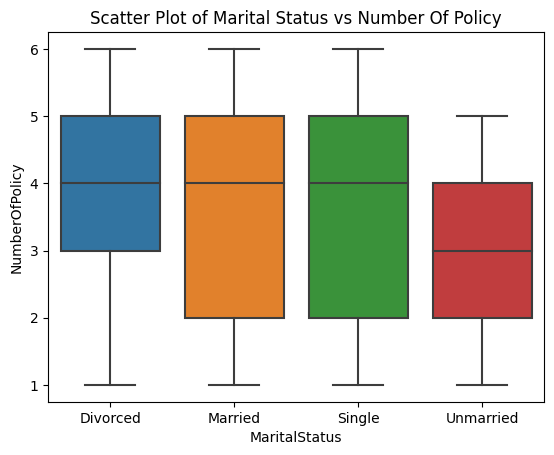

In [78]:
sns.boxplot(x=df['MaritalStatus'],y=df['NumberOfPolicy'])
plt.title('Scatter Plot of Marital Status vs Number Of Policy')

Text(0.5, 1.0, 'Scatter Plot of Zone vs Number Of Policy')

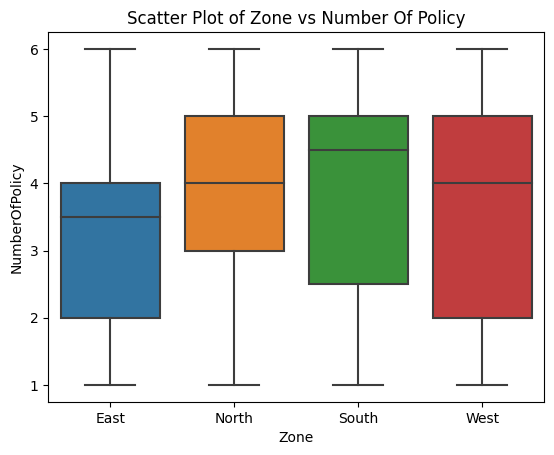

In [79]:
sns.boxplot(x=df['Zone'],y=df['NumberOfPolicy'])
plt.title('Scatter Plot of Zone vs Number Of Policy')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   AgentBonus            4520 non-null   float64 
 1   Age                   4520 non-null   float64 
 2   CustTenure            4520 non-null   float64 
 3   Channel               4520 non-null   category
 4   Occupation            4520 non-null   category
 5   EducationField        4520 non-null   category
 6   Gender                4520 non-null   category
 7   ExistingProdType      4520 non-null   float64 
 8   Designation           4520 non-null   category
 9   NumberOfPolicy        4520 non-null   float64 
 10  MaritalStatus         4520 non-null   category
 11  MonthlyIncome         4520 non-null   float64 
 12  Complaint             4520 non-null   float64 
 13  ExistingPolicyTenure  4520 non-null   float64 
 14  SumAssured            4520 non-null   float64 
 15  Zone

# NOTES-2

#Encoding the data

In [81]:
df.columns


Index(['AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

In [82]:
cat_data

Index(['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation',
       'MaritalStatus', 'Zone', 'PaymentMethod'],
      dtype='object')

In [83]:
df['Occupation']

0             Salaried
1             Salaried
2          Free Lancer
3             Salaried
4       Small Business
             ...      
4515    Small Business
4516          Salaried
4517          Salaried
4518    Small Business
4519          Salaried
Name: Occupation, Length: 4520, dtype: category
Categories (4, object): ['Free Lancer', 'Large Business', 'Salaried', 'Small Business']

In [84]:
columns_to_encode = ['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'Zone', 'PaymentMethod']

one_hot_encoded_df = pd.get_dummies(df[columns_to_encode], drop_first=True)

label_encoded_df = df[columns_to_encode].apply(lambda x: x.astype('category').cat.codes)

df = pd.concat([df, one_hot_encoded_df, label_encoded_df], axis=1)

df.drop(columns_to_encode, axis=1, inplace=True)


In [85]:
df1 =df.copy()

df1['CustID'] = cleaned_data['CustID']

#Split data

In [86]:
x=df.drop('AgentBonus',axis=1)
y=df[['AgentBonus']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3 , random_state=101)

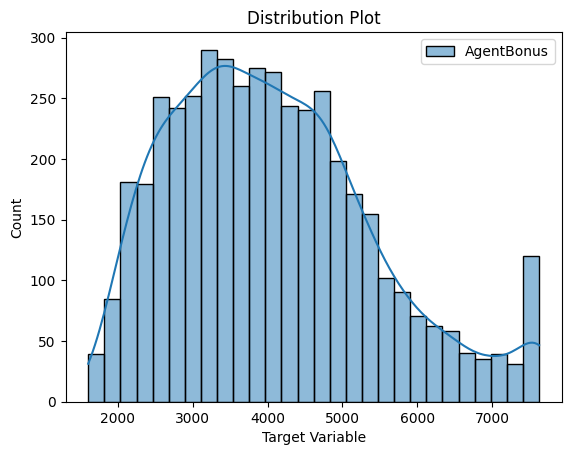

In [87]:
import seaborn as sns



sns.histplot(y, kde=True)
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.title('Distribution Plot')
plt.show()


#Data scaling

In [88]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train1=scaler.fit_transform(X_train)
X_test1=scaler.transform(X_test)

y_train1=scaler.fit_transform(y_train)
y_test1=scaler.transform(y_test)

In [89]:
col = X_train.columns
col1 = y_train.columns
X_train = pd.DataFrame(columns=col,data = X_train1)
X_test = pd.DataFrame(data=X_test1,columns=col)

y_train = pd.DataFrame(columns=col1,data = y_train1)
y_test = pd.DataFrame(data=y_test1,columns=col1)

#Modelling

#Clustering

CLustering technique is used to study the customer behaviour

In [90]:
df.columns

Index(['AgentBonus', 'Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore', 'Channel_Online',
       'Channel_Third Party Partner', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business',
       'EducationField_Engineer', 'EducationField_Graduate',
       'EducationField_MBA', 'EducationField_Post Graduate',
       'EducationField_Under Graduate', 'Gender_Male', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried', 'Zone_North', 'Zone_South', 'Zone_West',
       'PaymentMethod_Monthly', 'PaymentMethod_Quarterly',
       'PaymentMethod_Yearly'],
      dtype='object')

In [91]:
data =df.copy()

In [92]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [93]:
for i in range(2,11):
    print('The WSS value for',i,'clusters is',wcss[i-2])

The WSS value for 2 clusters is 82267066055718.42
The WSS value for 3 clusters is 39998822432730.31
The WSS value for 4 clusters is 22986119031573.34
The WSS value for 5 clusters is 14295994928696.252
The WSS value for 6 clusters is 10190939034117.523
The WSS value for 7 clusters is 7428230725812.594
The WSS value for 8 clusters is 5672881266338.305
The WSS value for 9 clusters is 4476951862878.242
The WSS value for 10 clusters is 3704024349361.38


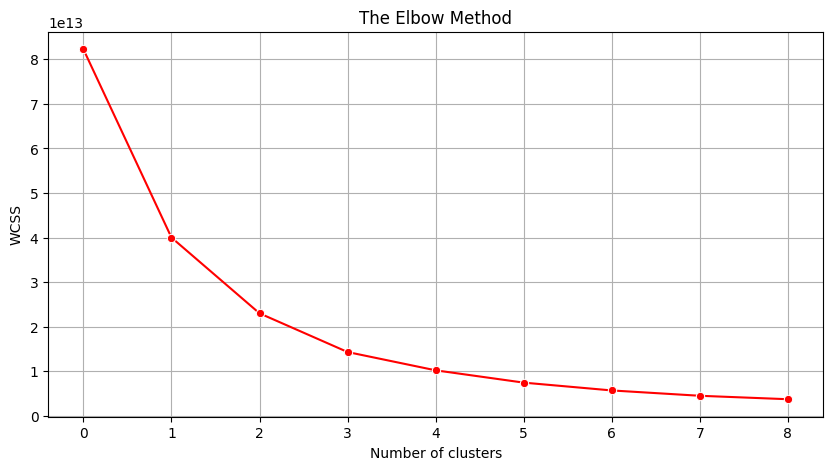

In [94]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [95]:
from sklearn.cluster import KMeans
features = ["Age", "CustTenure", "NumberOfPolicy", "MonthlyIncome", "Complaint"]
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[features])
labels_4 = kmeans.predict(df[features])
print(labels_4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 0 ... 2 2 2]


In [96]:
from sklearn.cluster import KMeans
features = ["Age", "CustTenure", "NumberOfPolicy", "MonthlyIncome", "Complaint"]
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[features])
labels_5 = kmeans.predict(df[features])
print(labels_5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[4 4 0 ... 4 4 2]


In [97]:
df1['kmeans_cluster_4'] = labels_4
data['kmeans_cluster_4']= labels_4
data['kmeans_cluster_5']= labels_5
data.head()

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,...,MaritalStatus_Single,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly,kmeans_cluster_4,kmeans_cluster_5
0,4409.0,22.0,4.0,3.0,2.0,20993.0,1.0,2.0,806761.0,5.0,...,1,0,1,0,0,0,0,0,2,4
1,2214.0,11.0,2.0,4.0,4.0,20130.0,0.0,3.0,294502.0,7.0,...,0,0,1,0,0,0,0,1,2,4
2,4273.0,26.0,4.0,4.0,3.0,17090.0,1.0,2.0,294502.0,0.0,...,0,1,1,0,0,0,0,1,0,0
3,1791.0,11.0,4.0,3.0,3.0,17909.0,1.0,2.0,268635.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,2955.0,6.0,4.0,3.0,4.0,18468.0,0.0,4.0,366405.0,2.0,...,0,0,0,0,1,0,0,0,0,0


In [98]:
data.groupby(by='kmeans_cluster_4')['AgentBonus','MonthlyIncome','SumAssured','Complaint'].mean()

<ipython-input-98-e78025fa499f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(by='kmeans_cluster_4')['AgentBonus','MonthlyIncome','SumAssured','Complaint'].mean()


,AgentBonus,MonthlyIncome,SumAssured,Complaint
kmeans_cluster_4,,,,
0,3287.670712,18244.728155,513632.145833,0.276699
1,4571.141758,26132.136264,692667.977747,0.315385
2,3926.041963,21811.040692,591890.010936,0.283316
3,5935.881127,32332.062500,872763.102941,0.274510


In [99]:
df1.head()

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,...,MaritalStatus_Single,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly,CustID,kmeans_cluster_4
0,4409.0,22.0,4.0,3.0,2.0,20993.0,1.0,2.0,806761.0,5.0,...,1,0,1,0,0,0,0,0,7000000.0,2
1,2214.0,11.0,2.0,4.0,4.0,20130.0,0.0,3.0,294502.0,7.0,...,0,0,1,0,0,0,0,1,7000001.0,2
2,4273.0,26.0,4.0,4.0,3.0,17090.0,1.0,2.0,294502.0,0.0,...,0,1,1,0,0,0,0,1,7000002.0,0
3,1791.0,11.0,4.0,3.0,3.0,17909.0,1.0,2.0,268635.0,0.0,...,0,0,0,0,1,0,0,0,7000003.0,0
4,2955.0,6.0,4.0,3.0,4.0,18468.0,0.0,4.0,366405.0,2.0,...,0,0,0,0,1,0,0,0,7000004.0,0


In [100]:
data.groupby(by='kmeans_cluster_5')['AgentBonus','MonthlyIncome','SumAssured','Complaint'].mean()

<ipython-input-100-8664c654e00c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(by='kmeans_cluster_5')['AgentBonus','MonthlyIncome','SumAssured','Complaint'].mean()


,AgentBonus,MonthlyIncome,SumAssured,Complaint
kmeans_cluster_5,,,,
0,3246.260606,17887.321212,510425.119444,0.283838
1,4799.104251,27253.866397,722887.408907,0.313765
2,4179.274164,23763.843722,632307.432023,0.273713
3,5935.881127,32332.062500,872763.102941,0.274510
4,3767.841223,20863.117028,569652.451019,0.293886


In [101]:
data.groupby(by='kmeans_cluster_4')['Zone_North','Zone_South','Zone_West','Complaint'].mean()

<ipython-input-101-b52c37bcec58>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(by='kmeans_cluster_4')['Zone_North','Zone_South','Zone_West','Complaint'].mean()


,Zone_North,Zone_South,Zone_West,Complaint
kmeans_cluster_4,,,,
0,0.401294,0.001618,0.584142,0.276699
1,0.436264,0.001099,0.550549,0.315385
2,0.428789,0.001526,0.554934,0.283316
3,0.362745,0.000000,0.617647,0.274510


In [102]:
data.groupby(by='kmeans_cluster_5')['Zone_North','Zone_South','Zone_West'].mean()

<ipython-input-102-a697ac19dd2d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(by='kmeans_cluster_5')['Zone_North','Zone_South','Zone_West'].mean()


,Zone_North,Zone_South,Zone_West
kmeans_cluster_5,,,
0,0.406061,0.002020,0.579798
1,0.421053,0.002024,0.562753
2,0.414634,0.001807,0.563686
3,0.362745,0.000000,0.617647
4,0.438527,0.000657,0.550953


In [103]:
data.groupby(by='kmeans_cluster_4')["LastMonthCalls", "CustTenure", "NumberOfPolicy", "CustCareScore", "Complaint",'AgentBonus'].mean()

<ipython-input-103-e350e30b934c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(by='kmeans_cluster_4')["LastMonthCalls", "CustTenure", "NumberOfPolicy", "CustCareScore", "Complaint",'AgentBonus'].mean()


,LastMonthCalls,CustTenure,NumberOfPolicy,CustCareScore,Complaint,AgentBonus
kmeans_cluster_4,,,,,,
0,3.114887,11.607605,3.091424,3.082524,0.276699,3287.670712
1,5.847253,16.031319,3.742857,3.036264,0.315385,4571.141758
2,4.548321,13.773652,3.745677,3.030010,0.283316,3926.041963
3,6.835784,20.966912,3.735294,3.289216,0.274510,5935.881127


#Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [105]:
y_predict_train = model.predict(X_train)
y_predict_train


array([[ 1.81162634],
       [-1.13122789],
       [ 2.13674575],
       ...,
       [ 0.17175761],
       [-0.0143594 ],
       [-0.6887975 ]])

In [106]:
y_predict_test=model.predict(X_test)

In [107]:
coefficients = model.coef_
print(coefficients)

[[ 0.14268728  0.15344354  0.04021898  0.00955914  0.08669002  0.0036484
   0.08254575  0.57160511 -0.00895317 -0.00591695  0.00663255  0.00244601
  -0.22081941 -0.36778885 -0.38379881 -0.01059463 -0.01737572 -0.01297737
  -0.01446439 -0.00277945  0.00472223 -0.19501761 -0.18920221 -0.08615635
   0.00661328 -0.00501355  0.01248732 -0.02403303 -0.02959526  0.00160093
  -0.03452683  0.02865859  0.01436709 -0.02781995]]


In [108]:
coefficients[0][0]

0.14268727886556584

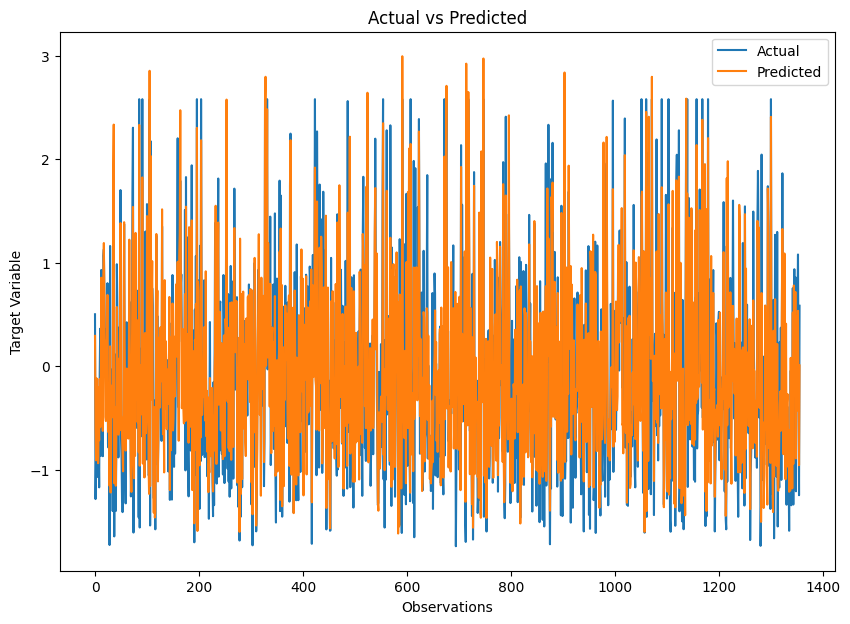

In [109]:
import matplotlib.pyplot as plt

# Assuming 'y_pred' is the predicted values and 'y_actual' is the actual target values
plt.figure(figsize=(10, 7))
plt.plot(y_test, label='Actual')
plt.plot(y_predict_test, label='Predicted')
plt.xlabel('Observations')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


In [110]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7959377114817047
0.7640666174905352


In [111]:
MSE_train = mean_squared_error(y_train,y_predict_train)
MSE_test = mean_squared_error(y_test,y_predict_test)

In [112]:
print('MSE value for training set',MSE_train)
print('MSE value for test set',MSE_test)

MSE value for training set 0.20406228851829522
MSE value for test set 0.22062063659258474


In [113]:
R2_train = r2_score(y_train,y_predict_train)
R2_test = r2_score(y_test,y_predict_test)

In [114]:
print('R-square value for training data', R2_train)
print('R-square value for test data', R2_test)

R-square value for training data 0.7959377114817047
R-square value for test data 0.7640666174905352


#Decision Tree

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
dTreeR = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 7, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8610166012793943
0.76930555022122


In [117]:
y_predict_train =   dTreeR.predict(X_train)
y_predict_test = dTreeR.predict(X_test)

In [118]:
MSE_train = mean_squared_error(y_train,y_predict_train)
MSE_test = mean_squared_error(y_test,y_predict_test)

In [119]:
print('MSE value for training set',MSE_train)
print('MSE value for test set',MSE_test)

MSE value for training set 0.13898339872060564
MSE value for test set 0.21572172546006183


In [120]:
R2_train = r2_score(y_train,y_predict_train)
R2_test = r2_score(y_test,y_predict_test)

In [121]:
print('R-square value for training data', R2_train)
print('R-square value for test data', R2_test)

R-square value for training data 0.8610166012793943
R-square value for test data 0.76930555022122


#Random forest

In [122]:
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

<ipython-input-122-66357a8f92ac>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR.fit(X_train, y_train)


RandomForestRegressor()

In [123]:
y_pred_train = RFR.predict(X_train)
y_pred_test = RFR.predict(X_test)


In [124]:
MSE_train = mean_squared_error(y_train,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)

In [125]:
print('MSE value for training set',MSE_train)
print('MSE value for test set',MSE_test)

MSE value for training set 0.021896605240277985
MSE value for test set 0.15569990329942957


In [126]:
R2_train = r2_score(y_train,y_pred_train)
R2_test = r2_score(y_test,y_pred_test)

In [127]:
print('R-square value for training data', R2_train)
print('R-square value for test data', R2_test)

R-square value for training data 0.978103394759722
R-square value for test data 0.8334933421950533


#Ridge Regression

In [128]:
Rideg_model = Ridge(alpha=0.1)
Rideg_model.fit(X_train, y_train)



Ridge(alpha=0.1)

In [129]:
y_pred_test = Rideg_model.predict(X_test)
y_pred_train = Rideg_model.predict(X_train)

In [130]:
MSE_train = mean_squared_error(y_train,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)

In [131]:
print('MSE value for training set',MSE_train)
print('MSE value for test set',MSE_test)

MSE value for training set 0.2040625853654904
MSE value for test set 0.22061776167458433


In [132]:
R2_train = r2_score(y_train,y_pred_train)
R2_test = r2_score(y_test,y_pred_test)

In [133]:
print('R-square value for training data', R2_train)
print('R-square value for test data', R2_test)

R-square value for training data 0.7959374146345095
R-square value for test data 0.7640696919496553


#Lasso Regression

In [134]:
Lasso_model = Lasso(alpha=0.1)
Lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [135]:
y_pred_test = Lasso_model.predict(X_test)
y_pred_train = Lasso_model.predict(X_train)

In [136]:
MSE_train = mean_squared_error(y_train,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)

In [137]:
print('MSE value for training set',MSE_train)
print('MSE value for test set',MSE_test)

MSE value for training set 0.23636930490213084
MSE value for test set 0.24151285389996607


In [138]:
R2_train = r2_score(y_train,y_pred_train)
R2_test = r2_score(y_test,y_pred_test)

In [139]:
print('R-square value for training data', R2_train)
print('R-square value for test data', R2_test)

R-square value for training data 0.7636306950978691
R-square value for test data 0.7417243218033196


#Support vector regression

In [140]:
svr = SVR(kernel='linear', C=1.0)
svr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [141]:
y_pred_test = svr.predict(X_test)
y_pred_train = svr.predict(X_train)

In [142]:
MSE_train = mean_squared_error(y_train,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)

In [143]:
print('MSE value for training set',MSE_train)
print('MSE value for test set',MSE_test)

MSE value for training set 0.206962555036038
MSE value for test set 0.22369665187877813


In [144]:
R2_train = r2_score(y_train,y_pred_train)
R2_test = r2_score(y_test,y_pred_test)

In [145]:
print('R-square value for training data', R2_train)
print('R-square value for test data', R2_test)

R-square value for training data 0.7930374449639619
R-square value for test data 0.7607771034073054


#Cross validation


##Linear Regression

In [146]:
Crs_model = LinearRegression()
scores = cross_val_score(Crs_model, x, y, cv=4, scoring='neg_mean_squared_error')

In [147]:
mse_scores = -scores

print("Mean MSE:", mse_scores.mean())
print("Standard Deviation of MSE:", mse_scores.std())

Mean MSE: 403984.01625404815
Standard Deviation of MSE: 9035.649824412087


##Decision Tree

In [148]:
dtr_model =DecisionTreeRegressor()
scores = cross_val_score(dtr_model, x, y, cv=4, scoring='neg_mean_squared_error')

In [149]:
mse_scores = -scores

print("Mean MSE:", mse_scores.mean())
print("Standard Deviation of MSE:", mse_scores.std())

Mean MSE: 564302.3329646017
Standard Deviation of MSE: 20423.08082728875


##Random Forest

In [150]:
rfr_model =RandomForestRegressor()
scores = cross_val_score(rfr_model, x, y, cv=5, scoring='neg_mean_squared_error')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [151]:
mse_scores = -scores

print("Mean MSE:", mse_scores.mean())
print("Standard Deviation of MSE:", mse_scores.std())

Mean MSE: 284113.11751702987
Standard Deviation of MSE: 16646.169880130456


# Ensemble Learning

## Bagging

In [152]:
bagging_regressor = BaggingRegressor(base_estimator=RFR, n_estimators=100, random_state=42)
bagging_regressor.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=100,
                 random_state=42)

In [153]:
predictions_train = bagging_regressor.predict(X_train)
predictions_test = bagging_regressor.predict(X_test)

In [154]:
MSE_train = mean_squared_error(y_train,predictions_train)
MSE_test = mean_squared_error(y_test,predictions_test)

In [155]:
print('MSE value for training set',MSE_train)
print('MSE value for test set',MSE_test)

MSE value for training set 0.055574483354927214
MSE value for test set 0.15877309670967715


In [156]:
R2_train = r2_score(y_train,y_predict_train)
R2_test = r2_score(y_test,y_predict_test)

In [157]:
print('R-square value for training data', R2_train)
print('R-square value for test data', R2_test)

R-square value for training data 0.8610166012793943
R-square value for test data 0.76930555022122


## Boosting



In [158]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [159]:
predictions_test = gb_regressor.predict(X_test)
predictions_train = gb_regressor.predict(X_train)

In [160]:
MSE_train = mean_squared_error(y_train,predictions_train)
MSE_test = mean_squared_error(y_test,predictions_test)

In [161]:
print('MSE value for training set',MSE_train)
print('MSE value for test set',MSE_test)

MSE value for training set 0.12939592112871784
MSE value for test set 0.162921695251487


In [162]:
R2_train = r2_score(y_train,y_predict_train)
R2_test = r2_score(y_test,y_predict_test)

In [163]:
print('R-square value for training data', R2_train)
print('R-square value for test data', R2_test)

R-square value for training data 0.8610166012793943
R-square value for test data 0.76930555022122
